# ADA2017 - Homework 1

**Group Member:** Di WU - Shengzhao LEI - Tao SUN - Xiangzhe MENG

# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [42]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [109]:
%matplotlib inline
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per month of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## Solution

We decided to import data files of each country separately, and concatenate them together into a new DataFrame.

First of all, we defined **two functions (get_daily_total_new_cases_df & get_daily_total_new_deaths_df)** which can be used by the data load for all these 3 countries.

- **get_daily_total_new_cases_df**: 

      Reform the DF in order to return a new DF with Date as Index and Total new cases per day as Columns.
- **get_daily_total_new_deaths_df**: 

      Reform the DF in order to return a new DF with Date as Index and Total new deaths per day as Columns.

In [44]:
def get_daily_total_new_cases_df(temp_case):
    temp_case = temp_case.set_index(['Date','Description']);
    temp_case['Totals'] = temp_case['Totals'].apply(pd.to_numeric);
    temp_case = temp_case.groupby('Date').sum();
    temp_case.columns = ['New cases'];
    return temp_case;

In [45]:
def get_daily_total_new_deaths_df(temp_death):
    temp_death = temp_death.set_index('Date');
    temp_death = temp_death.drop('Description',axis=1);
    temp_death.columns = ['New deaths'];
    temp_death['New deaths'] = temp_death['New deaths'].apply(pd.to_numeric);
    temp_death = temp_death.groupby('Date').sum();
    return temp_death;

**Import Guinea data**

We found that there is a column named 'Totals' for each file and the value of this column is the total number of all the cities of Guinea. 

Thus, we decided to keep only three columns: Date, Description & Totals.

In [46]:
#import all guinea files into a DF ebola_guinea
all_ebola_guinea_files = glob.glob(DATA_FOLDER + "ebola/guinea_data/*.csv")
ebola_guinea = pd.concat((pd.read_csv(f) for f in all_ebola_guinea_files),ignore_index=True)

#only keep three columns: Date, Description & Totals
ebola_guinea = ebola_guinea[['Date','Description','Totals']].fillna(0)

#change column "Date" type to datetime and set the display form 
ebola_guinea['Date'] = ebola_guinea['Date'].apply(pd.to_datetime)
ebola_guinea['Date'] = ebola_guinea['Date'].dt.strftime('%Y-%m-%d')

**Daily new cases for Guinea**

First of all, we collected all the potential description for new cases and chosed the suitable description.

In [47]:
temp_case = ebola_guinea[[pd.Series(des).str.contains('[nN]ew case[s]{0,1}') for des in ebola_guinea.Description]]
temp_case.head(20)

,Date,Description,Totals
0,2014-08-04,New cases of suspects,5
1,2014-08-04,New cases of probables,0
2,2014-08-04,New cases of confirmed,4
3,2014-08-04,Total new cases registered so far,9
42,2014-08-26,New cases of suspects,18
43,2014-08-26,New cases of probables,0
44,2014-08-26,New cases of confirmed,10
45,2014-08-26,Total new cases registered so far,28
57,2014-08-26,New cases of confirmed among health workers,0
74,2014-08-27,New cases of suspects,12


From the DF above, we found that all the files contain the description "New cases of suspects", "New cases of probables" and "New cases of confirmed". 

Thus, we assumed that the total new cases per day is:
**_'New cases of suspects' + 'New cases of probables' + 'New cases of confirmed'_**

With the cell below, we collected all the corresponding data and calculate the sum per day and put the result into the same DF.

(Index: Date, Colums: Total new cases)

In [48]:
temp_case = temp_case[[(des == 'New cases of suspects') or (des == 'New cases of probables') or (des == 'New cases of confirmed') for des in temp_case.Description]]
temp_case = get_daily_total_new_cases_df(temp_case);
temp_case.head(20)

,New cases
Date,
2014-08-04,9
2014-08-26,28
2014-08-27,22
2014-08-30,24
2014-08-31,46
2014-09-02,25
2014-09-04,30
2014-09-07,16
2014-09-08,16


**Daily new deaths for Guinea**

First of all, we collected all the potential description for new deaths and chosed the suitable description.

In [49]:
temp_death = ebola_guinea[[pd.Series(des).str.contains('[nN]ew death[s]{0,1}') for des in ebola_guinea.Description]]
temp_death.head(20)

,Date,Description,Totals
8,2014-08-04,New deaths registered today,2
9,2014-08-04,New deaths registered today (confirmed),2
10,2014-08-04,New deaths registered today (probables),0
11,2014-08-04,New deaths registered today (suspects),0
51,2014-08-26,New deaths registered,5
59,2014-08-26,New deaths registered among health workers,0
83,2014-08-27,New deaths registered,2
91,2014-08-27,New deaths registered among health workers,0
115,2014-08-30,New deaths registered,5
123,2014-08-30,New deaths registered among health workers,0


From the DF above, we found that all the files contain the description "New deaths registered" except for the date 2014-08-04. However, we found a similar description "New deaths registered today" for 2014-08-04.

Thus, we assumed that the total new cases per day is: 

- **'New cases of suspects today' for 2014-08-04**
- **'New deaths registered' for all the other days**

With the cell below, we collected all the corresponding data and calculate the sum per day and put the result into the same DF.

(Index: Date, Colums: Total new deaths)

In [50]:
temp_death = temp_death[[(des == 'New deaths registered') or (des == 'New deaths registered today') for des in temp_death.Description]]
temp_death = get_daily_total_new_deaths_df(temp_death);
temp_death

,New deaths
Date,
2014-08-04,2
2014-08-26,5
2014-08-27,2
2014-08-30,5
2014-08-31,3
2014-09-02,5
2014-09-04,5
2014-09-07,4
2014-09-08,4


Concatenate the two DFs temp_case and temp_death along the axis **1**:

In [51]:
df_guinea = pd.concat([temp_case,temp_death],axis = 1)

#rename the columns
df_guinea.columns=[['Guinea','Guinea'],['New cases','New deaths']]
df_guinea

Guinea           
           New cases New deaths
Date                           
2014-08-04         9          2
2014-08-26        28          5
2014-08-27        22          2
2014-08-30        24          5
2014-08-31        46          3
2014-09-02        25          5
2014-09-04        30          5
2014-09-07        16          4
2014-09-08        16          4
2014-09-09        16          7
2014-09-11        22          2
2014-09-14        25          1
2014-09-16        10          3
2014-09-17        10          3
2014-09-19        16          5
2014-09-21        18          0
2014-09-22        19          3
2014-09-23        29          3
2014-09-24        28          3
2014-09-26        19          5
2014-09-30        15          4
2014-10-01        34         15

We imported Liberia and SL's data with the same procedure as above:

**Import Liberia data**

We found that there is a column named 'National' for each file and the value of this column is the total number of all the cities of Guinea. 

Thus, we decided to keep only three columns: Date, Variable & National.

In [52]:
all_ebola_liberia_files = glob.glob(DATA_FOLDER + "ebola/liberia_data/*.csv")
ebola_liberia = pd.concat((pd.read_csv(f) for f in all_ebola_liberia_files),ignore_index=True)

#only keep three columns: Date, Variable & National
ebola_liberia = ebola_liberia[['Date','Variable','National']].fillna(0)

#rename colums
ebola_liberia.columns = ['Date','Description','Totals']
ebola_liberia['Date'] = ebola_liberia['Date'].apply(pd.to_datetime)
ebola_liberia['Date'] = ebola_liberia['Date'].dt.strftime('%Y-%m-%d')

Assumption for new cases:

The total new cases per day is: **'New Case/s (Suspected)' + 'New Case/s (Probable)' + 'New case/s (confirmed)'**

In [53]:
temp_case = ebola_liberia[[pd.Series(des).str.contains('[nN]ew [cC]ase[s]{0,1}') for des in ebola_liberia.Description]]
temp_case = temp_case[[(des == 'New Case/s (Suspected)') or (des == 'New Case/s (Probable)') or (des == 'New case/s (confirmed)') for des in temp_case.Description]]
temp_case = get_daily_total_new_cases_df(temp_case);

Assumption for new deaths:

The total new deaths per day is: **'Newly reported deaths'**

In [54]:
temp_death = ebola_liberia[[pd.Series(des).str.contains('[nN]ewly reported death[s]{0,1}') for des in ebola_liberia.Description]]
temp_death = temp_death[[(des == 'Newly reported deaths') for des in temp_death.Description]]
temp_death = get_daily_total_new_deaths_df(temp_death);

Concatenation

In [55]:
df_liberia = pd.concat([temp_case,temp_death],axis = 1)
df_liberia.columns=[['Liberia','Liberia'],['New cases','New deaths']]
df_liberia.head(20)

Liberia           
           New cases New deaths
Date                           
2014-06-16       4.0        2.0
2014-06-17       2.0        0.0
2014-06-22      10.0        4.0
2014-06-24       6.0        4.0
2014-06-25       7.0        3.0
2014-06-28       9.0        1.0
2014-06-29       2.0        0.0
2014-07-01       4.0        5.0
2014-07-02       4.0        5.0
2014-07-03       4.0        4.0
2014-07-07       7.0        2.0
2014-07-08       3.0        2.0
2014-07-10       3.0        4.0
2014-07-13       5.0        3.0
2014-07-17      10.0        3.0
2014-07-20       3.0        4.0
2014-07-24      32.0        6.0
2014-07-26      19.0        9.0
2014-08-02      11.0       13.0
2014-08-04      10.0        7.0

**Import Sierra Leone data**

We found that there is a column named 'National' for each file and the value of this column is the total number of all the cities of Guinea. 

Thus, we decided to keep only three columns: date, variable & National.

In [56]:
all_ebola_sl_files = glob.glob(DATA_FOLDER + "ebola/sl_data/*.csv")
ebola_sl = pd.concat((pd.read_csv(f) for f in all_ebola_sl_files),ignore_index=True)

#only keep three columns: date, variable & National
ebola_sl = ebola_sl[['date','variable','National']].fillna(0)

#rename colums
ebola_sl.columns = ['Date','Description','Totals']
ebola_sl['Date'] = ebola_sl['Date'].apply(pd.to_datetime)
ebola_sl['Date'] = ebola_sl['Date'].dt.strftime('%Y-%m-%d')

Assumption for new cases:

The total new cases per day is: **'new_noncase' + 'new_suspected' + 'new_probable' + 'new_confirmed'**

In [57]:
temp_case = ebola_sl[[(des == 'new_noncase') or (des == 'new_suspected') or (des == 'new_probable') or (des == 'new_confirmed') for des in ebola_sl.Description]]
temp_case = get_daily_total_new_cases_df(temp_case);

Assumption for new deaths:

The total new deaths per day is: **'death_suspected' + 'death_probable' + 'death_confirmed'**

In [58]:
temp_death = ebola_sl[[(des == 'death_suspected') or (des == 'death_probable') or (des == 'death_confirmed') for des in ebola_sl.Description]]
temp_death = get_daily_total_new_deaths_df(temp_death);

Cancatenation

In [59]:
df_sl = pd.concat([temp_case,temp_death],axis = 1)
df_sl.columns=[['Sierra Leone','Sierra Leone'],['New cases','New deaths']]
df_sl.head(20)

Sierra Leone           
              New cases New deaths
Date                              
2014-08-12         26.0      303.0
2014-08-13         32.0      312.0
2014-08-14         41.0      319.0
2014-08-15         32.0      326.0
2014-08-16         30.0      336.0
2014-08-17         16.0      344.0
2014-08-18         60.0      351.0
2014-08-19         46.0      359.0
2014-08-20          9.0      361.0
2014-08-21         17.0      371.0
2014-08-22         84.0      375.0
2014-08-23         33.0      381.0
2014-08-24         44.0      386.0
2014-08-25         32.0      400.0
2014-08-26          0.0        0.0
2014-08-27         39.0      420.0
2014-08-28         42.0      425.0
2014-08-29          0.0        0.0
2014-08-30         57.0      435.0
2014-08-31         57.0      435.0

**Final concatenation for 3 countries**

Concatenate the DFs of the three country along the axis **1**:

In [60]:
#concatenation
df = pd.concat([df_guinea,df_liberia,df_sl],axis=1)

#change the column type to numeric
df = df.apply(pd.to_numeric)

#change the index type to standard datetime
df.index = pd.to_datetime(df.index)
df.head(50)

Guinea              Liberia            Sierra Leone           
           New cases New deaths New cases New deaths    New cases New deaths
2014-06-16       NaN        NaN       4.0        2.0          NaN        NaN
2014-06-17       NaN        NaN       2.0        0.0          NaN        NaN
2014-06-22       NaN        NaN      10.0        4.0          NaN        NaN
2014-06-24       NaN        NaN       6.0        4.0          NaN        NaN
2014-06-25       NaN        NaN       7.0        3.0          NaN        NaN
2014-06-28       NaN        NaN       9.0        1.0          NaN        NaN
2014-06-29       NaN        NaN       2.0        0.0          NaN        NaN
2014-07-01       NaN        NaN       4.0        5.0          NaN        NaN
2014-07-02       NaN        NaN       4.0        5.0          NaN        NaN
2014-07-03       NaN        NaN       4.0        4.0          NaN        NaN
2014-07-07       NaN        NaN       7.0        2.0          NaN        NaN
2014-07-08       NaN        NaN       3.0        2.0          NaN        NaN
2014-07-10       NaN        NaN       3.0        4.0          NaN        NaN
2014-07-13       NaN        NaN       5.0        3.0          NaN        NaN
2014-07-17       NaN        NaN      10.0        3.0          NaN        NaN
2014-07-20       NaN        NaN       3.0        4.0          NaN        NaN
2014-07-24       NaN        NaN      32.0        6.0          NaN        NaN
2014-07-26       NaN        NaN      19.0        9.0          NaN        NaN
2014-08-02       NaN        NaN      11.0       13.0          NaN        NaN
2014-08-04       9.0        2.0      10.0        7.0          NaN        NaN
2014-08-12       NaN        NaN      60.0       29.0         26.0      303.0
2014-08-13       NaN        NaN       NaN        NaN         32.0      312.0
2014-08-14       NaN        NaN       NaN        NaN         41.0      319.0
2014-08-15       NaN        NaN      19.0       17.0         32.0      326.0
2014-08-16       NaN        NaN       NaN        NaN         30.0      336.0
2014-08-17       NaN        NaN      24.0       11.0         16.0      344.0
2014-08-18       NaN        NaN      56.0       30.0         60.0      351.0
2014-08-19       NaN        NaN       NaN        NaN         46.0      359.0
2014-08-20       NaN        NaN      65.0       23.0          9.0      361.0
2014-08-21       NaN        NaN       NaN        NaN         17.0      371.0
2014-08-22       NaN        NaN       NaN        NaN         84.0      375.0
2014-08-23       NaN        NaN       NaN        NaN         33.0      381.0
2014-08-24       NaN        NaN       NaN        NaN         44.0      386.0
2014-08-25       NaN        NaN      29.0       28.0         32.0      400.0
2014-08-26      28.0        5.0       NaN        NaN          0.0        0.0
2014-08-27      22.0        2.0       NaN        NaN         39.0      420.0
2014-08-28       NaN        NaN      61.0       51.0         42.0      425.0
2014-08-29       NaN        NaN       NaN        NaN          0.0        0.0
2014-08-30      24.0        5.0       NaN        NaN         57.0      435.0
2014-08-31      46.0        3.0       NaN        NaN         57.0      435.0
2014-09-01       NaN        NaN      73.0       34.0         14.0      444.0
2014-09-02      25.0        5.0      76.0       47.0         56.0      447.0
2014-09-03       NaN        NaN      24.0       27.0         47.0      452.0
2014-09-04      30.0        5.0      52.0       36.0          NaN        NaN
2014-09-05       NaN        NaN      54.0       51.0          0.0        0.0
2014-09-06       NaN        NaN      70.0       44.0         84.0      474.0
2014-09-07      16.0        4.0      35.0       22.0         23.0      476.0
2014-09-08      16.0        4.0      65.0       47.0         43.0      481.0
2014-09-09      16.0        7.0       NaN        NaN         65.0      484.0
2014-09-10       NaN        NaN      59.0       46.0         50.0      493.0

Calculate daily average per month for each country:

In [61]:
#Calculate the mean value for each month
df = df.groupby(pd.TimeGrouper(freq='M')).mean()

#rename the index, from date to month (eg.2014-10-31 --> October)
df = df.rename(index=lambda x: x.strftime('%B'))

#replace all the Nan value by the tag unkown
df = df.fillna('unknown')

Show the final result DateFrame:

In [62]:
df

Guinea                 Liberia            Sierra Leone           
          New cases New deaths    New cases New deaths    New cases New deaths
June        unknown    unknown     5.714286   2.000000      unknown    unknown
July        unknown    unknown     8.545455   4.272727      unknown    unknown
August         25.8        3.4    37.222222  23.222222        34.85     331.95
September    19.625     3.5625    63.833333  36.041667       67.931        488
October          34         15    45.560000  28.040000      124.214    1162.36
November    unknown    unknown    26.466667  13.466667      156.143    1453.48
December    unknown    unknown  5178.555556   0.000000        135.8     1607.6

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Solution

**_We implemented two methods to import these 10 spreadsheets. The main difference between these two methods is the way we deal with the index and the columns._**

Import the metadata file into the DataFrame named metadame:

In [63]:
metadata = pd.read_excel(DATA_FOLDER + 'microbiome/metadata.xls', sheetname='Sheet1', index_col='BARCODE')

### First method

Use a for-loop to import 9 microbiome data files into 9 different temporary DataFrames successively and put all these DateFrames into a list named microbiome_data:

In [64]:
midFiles = glob.glob(DATA_FOLDER + "microbiome/MID*.xls")

#replace all the NaN values by the tag unknown
metadata[metadata.isnull()] = 'unknown'
midList = []

for i in range(len(midFiles)):
    #import the ith data files into the temporary DF
    temp = pd.read_excel(midFiles[i], header=None)
    barcode = "MID{}".format(i+1)
    temp.columns = ['TAXON', 'COUNT']
    
    #add new columns 'Group'&'Sample' and get the corresponding information from the metadata DF
    temp["GROUP"] = metadata.loc[barcode, "GROUP"]
    temp["SAMPLE"] = metadata.loc[barcode, "SAMPLE"]
    
    temp = temp.set_index(["TAXON",'SAMPLE','GROUP'])
    midList.append(temp)    

Concetenate 9 elements of the list midList:

In [65]:
microbiome_data = pd.concat(midList).sort_index() 

Make sure that the final DataFrame has a unique index:

In [66]:
microbiome_data.index.is_unique

True

Show the final Dataframe:

In [67]:
microbiome_data

COUNT
TAXON                                              SAMPLE  GROUP                    
Archaea "Crenarchaeota" Thermoprotei Acidilobal... tissue  Control 1               1
                                                           Control 2               5
                                                           NEC 1                   2
Archaea "Crenarchaeota" Thermoprotei Acidilobal... stool   Control 1               1
                                                           Control 2               1
                                                   tissue  Control 1              15
                                                           Control 2              26
                                                           NEC 1                  14
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... stool   Control 1               8
                                                           Control 2              16
                                                           NEC 1                   7
                                                   tissue  Control 1              14
                                                           Control 2              28
                                                           NEC 1                  23
                                                           NEC 2                   2
                                                   unknown EXTRACTION CONTROL      7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... tissue  Control 2               1
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... stool   Control 1               2
                                                           Control 2               2
                                                           NEC 1                   1
                                                   tissue  Control 1               4
                                                           Control 2               5
                                                           NEC 1                   1
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... tissue  Control 1               1
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... stool   Control 1               1
                                                   tissue  Control 1               1
                                                           Control 2               2
                                                           NEC 1                   2
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... tissue  NEC 1                   1
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... stool   Control 1               1
...                                                                              ...
Bacteria "Verrucomicrobia" Subdivision3   Subdi... stool   Control 1               4
Bacteria "Verrucomicrobia" Verrucomicrobiae Ver... stool   Control 1               9
                                                           NEC 1                   1
                                                   tissue  Control 1               2
Bacteria "Verrucomicrobia" Verrucomicrobiae Ver... stool   Control 1              39
                                                           NEC 1                   1
                                                   tissue  Control 1               1
Bacteria Cyanobacteria Cyanobacteria  Chloropla... stool   Control 1               1
                                                           NEC 2                   1
                                                   tissue  Control 1               1
                                                           Control 2               2
                                                   unknown EXTRACTION CONTROL      2
Bacteria Cyanobacteria Cyanobacteria  Chloropla... stool   Control 1               2
                                                           Control 2               1
                                                           NEC 2                   4

### Second method

Use a for-loop to import 9 microbiome data files into 9 different temporary DataFrames successively and put all these DateFrames into a list named microbiome_data:

In [68]:
microbiome_data=[]
for i in range(1,10):
    filename = '{}microbiome/MID{}.xls'.format(DATA_FOLDER,i)
    
    #import the ith data files into the temporary DF
    temp = pd.read_excel(filename, sheetname='Sheet 1', header=None, index_col=0)
    temp.index.name = 'Taxon'
    temp.columns = ['Count']
    
    #add new columns 'Group'&'Sample' and get the corresponding information from the metadata DF  
    temp['Group'] = metadata.loc['MID{}'.format(i), 'GROUP']
    temp['Sample'] = metadata.loc['MID{}'.format(i), 'SAMPLE']
    
    #reshape the columns (two levels' columns)
    temp.columns = [['MID{}'.format(i),'MID{}'.format(i),'MID{}'.format(i)], ['Group', 'Sample', 'Count']]
    
    #add the temporary DF to the list microbiome_data
    microbiome_data.append(temp)

Concetenate 9 elements of the list microbiome_data (9 DFs) along the axis **1**:

In [69]:
microbiome_data = pd.concat(microbiome_data,axis=1)

Replace all the NaN values by the tag unknown and set index name as Taxon:

In [70]:
microbiome_data = microbiome_data.fillna('unknown')
microbiome_data.index.name = 'Taxon'

Make sure that the final DataFrame has a unique index:

In [71]:
microbiome_data.index.is_unique

True

Show the final Dataframe:

In [72]:
microbiome_data

MID1  \
                                                      Group   
Taxon                                                         
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unknown   
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        7   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...        3   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  unknown   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...        3   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...  unknown   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...  unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...        7   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...        1   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...        1   
Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...        1   
Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...        1   
Archaea "Euryarchaeota" Halobacteria Halobacter...  unknown   
Archaea "Euryarchaeota" Halobacteria Halobacter...  unknown   
Archaea "Euryarchaeota" Halobacteria Halobacter...  unknown   
Archaea "Euryarchaeota" Halobacteria Halobacter...        1   
Archaea "Euryarchaeota" Halobacteria Halobacter...        4   
...                                                     ...   
Bacteria "Proteobacteria" Gammaproteobacteria X...  unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...  unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...  unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...  unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...  unknown   
Bacteria "Proteobacteria" Gammaproteobacteria X...  unknown   
Bacteria "Spirochaetes" Spirochaetes Spirochaet...        1   
Bacteria "Synergistetes" Synergistia Synergista...        2   
Bacteria "Synergistetes" Synergistia Synergista...        1   
Bacteria "Synergistetes" Synergistia Synergista...        1   
Bacteria "Tenericutes" Mollicutes Anaeroplasmat...  unknown   
Bacteria "Tenericutes" Mollicutes Haloplasmatal...        1   
Bacteria "Thermodesulfobacteria" Thermodesulfob...        1   
Bacteria "Thermodesulfobacteria" Thermodesulfob...  unknown   
Bacteria "Thermotogae" Thermotogae Thermotogale...        7   
Bacteria "Thermotogae" Thermotogae Thermotogale...        9   
Bacteria "Verrucomicrobia" Opitutae Opitutales ...        1   
Bacteria "Verrucomicrobia" Opitutae Opitutales ...  unknown   
Bacteria "Verrucomicrobia" Opitutae Puniceicocc...  unknown   
Bacteria "Verrucomicrobia" Opitutae Puniceicocc...  unknown   
Bacteria "Verrucomicrobia" Opitutae Puniceicocc...  unknown   
Bacteria "Verrucomicrobia" Subdivision3   Subdi...  unknown   
Bacteria "Verrucomicrobia" Verrucomicrobiae Ver...  unknown   
Bacteria "Verrucomicrobia" Verrucomicrobiae Ver...  unknown   
Bacteria Cyanobacteria Cyanobacteria  Chloropla...        2   
Bacteria Cyanobacteria Cyanobacteria  Chloropla...       85   
Bacteria Cyanobacteria Cyanobacteria  Chloropla...     1388   
Bacteria OD1    OD1_genera_incertae_sedis           unknown   
Bacteria OP11    OP11_genera_incertae_sedis         unknown   
Bacteria TM7    TM7_genera_incertae_sedis           unknown   

                      

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [73]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [74]:
titanic = pd.read_excel(DATA_FOLDER + "titanic.xls", 'titanic')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

## Solution

### Question 1: 

Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.

### Answer
First of all, we get the type of each attribute as well as general information of the table.

In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


Then, we examine every attribute to show its value range and to see if it can be categorical.

In [76]:
for attribute in titanic.columns:
    print(str(attribute)+ ":\n" + str(pd.Categorical(titanic[attribute])) + "\n")

pclass:
[1, 1, 1, 1, 1, ..., 3, 3, 3, 3, 3]
Length: 1309
Categories (3, int64): [1, 2, 3]

survived:
[1, 1, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 1309
Categories (2, int64): [0, 1]

name:
[Allen, Miss. Elisabeth Walton, Allison, Master. Hudson Trevor, Allison, Miss. Helen Loraine, Allison, Mr. Hudson Joshua Creighton, Allison, Mrs. Hudson J C (Bessie Waldo Daniels), ..., Zabour, Miss. Hileni, Zabour, Miss. Thamine, Zakarian, Mr. Mapriededer, Zakarian, Mr. Ortin, Zimmerman, Mr. Leo]
Length: 1309
Categories (1307, object): [Abbing, Mr. Anthony, Abbott, Master. Eugene Joseph, Abbott, Mr. Rossmore Edward, Abbott, Mrs. Stanton (Rosa Hunt), ..., van Billiard, Master. James William, van Billiard, Master. Walter John, van Billiard, Mr. Austin Blyler, van Melkebeke, Mr. Philemon]

sex:
[female, male, female, male, female, ..., female, female, male, male, male]
Length: 1309
Categories (2, object): [female, male]

age:
[29.0000, 0.9167, 2.0000, 30.0000, 25.0000, ..., 14.5, NaN, 26.5, 27.0, 29.0]
L

As we can see, there are many attributes that can be categorical but only a few that **we would probably use in later questions**, which are *pclass*, *survived*, *sex* and *embarked*. Here, we only make these four attributes categorical.

For *pclass*, we use *1st class*, *2nd class*, *3rd class* instead of numbers.

In [77]:
titanic['pclass'] = titanic.pclass.astype('category')
titanic.pclass.cat.categories = ['1st class', '2nd class','3rd class']

For *survived*, we use *Not Survived* and *Survived* instead of 0 and 1.

In [78]:
titanic['survived'] = titanic.survived.astype('category')
titanic.survived.cat.categories = ["Not Survived", "Survived"]

For *sex*, we just use *female* and *male*.

In [79]:
titanic['sex'] = titanic.sex.astype('category')

For *embarked*, we replace all NaN values to *Unkown* and use *Cherbourg*, *Queenstown*, *Southampton* instead of single letter.

In [80]:
titanic.embarked = titanic.embarked.fillna('Unknown')
titanic['embarked'] = titanic.embarked.astype('category')
titanic.embarked.cat.categories = ["Cherbourg", "Queenstown", "Southampton", 'Unknown']

Drop all unwanted columns and show the final table and the type of each attribute.

In [81]:
titanic = titanic.drop(['name','sibsp','parch','ticket','fare','boat','body','home.dest'], axis=1)

In [82]:
titanic.head()

,pclass,survived,sex,age,cabin,embarked
0,1st class,Survived,female,29.0000,B5,Southampton
1,1st class,Survived,male,0.9167,C22 C26,Southampton
2,1st class,Not Survived,female,2.0000,C22 C26,Southampton
3,1st class,Not Survived,male,30.0000,C22 C26,Southampton
4,1st class,Not Survived,female,25.0000,C22 C26,Southampton


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
pclass      1309 non-null category
survived    1309 non-null category
sex         1309 non-null category
age         1046 non-null float64
cabin       295 non-null object
embarked    1309 non-null category
dtypes: category(4), float64(1), object(1)
memory usage: 26.1+ KB


### Question 2: 

Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

### Answer
Plot bar chart for the *travel class* attribute.

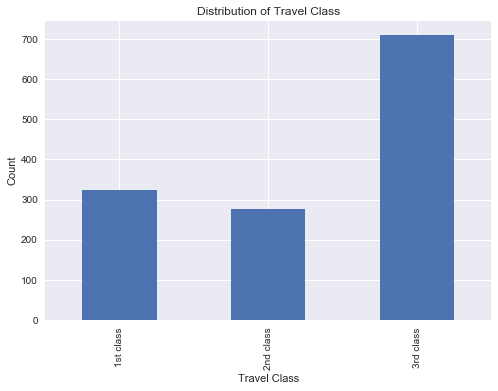

In [84]:
titanic.groupby(['pclass']).size().plot(kind='bar')
plt.title("Distribution of Travel Class", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Travel Class')

Plot bar chart for the *embarkation port* attribute.

Here we also have **Unknown** port for those whose value of the *embarked* attribute is NaN in the original table. ( As there are only two NaN values, we cannot clearly observe this part from the histgram.)

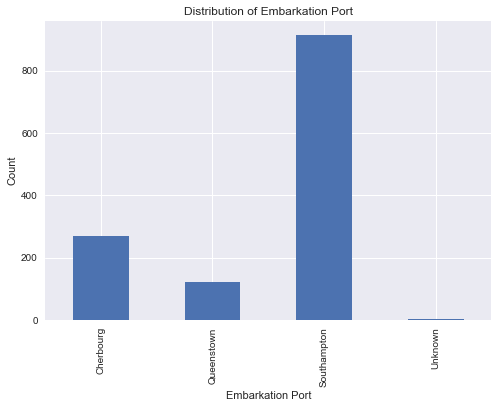

In [85]:
titanic.groupby(['embarked']).size().plot(kind='bar')
plt.title("Distribution of Embarkation Port", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Embarkation Port')

Plot bar chart for the *sex* attribute.

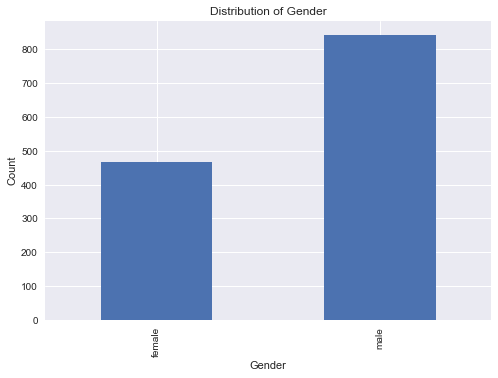

In [86]:
titanic.groupby(['sex']).size().plot(kind='bar')
plt.title("Distribution of Gender", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Gender')

Plot bar chart for the *age* attribute. 

Here, we make two assumptions:
1. We drop all NaN values. We think they are meaningless.
2. All values with a decimal point are correct. The decimal part may mean the months.

And from question 1, we know that the value range of age is from 0.1667 to 80. So we build 8 groups.

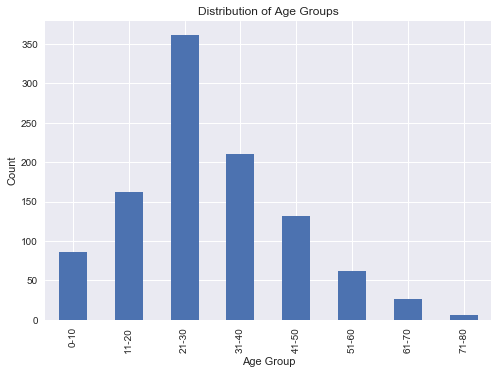

In [110]:
# drop the NaN columns
titanic_age = titanic[titanic.age.notnull()]
# cut the table into eight age groups
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_age['age_group'] = pd.cut(titanic_age.age, range(0, 81, 10), right=True, labels=age_labels)
# plot
titanic_age.groupby(['age_group']).size().plot(kind='bar')
plt.title("Distribution of Age Groups", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Age Group')

### Question 3: 

Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

### Answer
Plot pie chart for the proportion of passengers by cabin floor.

In order to get the cabin floor of each person, we make three assumptions here:
1. There are 8 different cabin floor, A, B, C, D, E, F, G and T.
2. All NaN values are meaningless so we drop them all in this question.
2. Only the first letter in the *cabin* attribute makes sense. e.g. Someone has "F E12" in his *cabin* value. He may bought both F and E cabin floors but only lived in the F floor. So we only care the first letter.

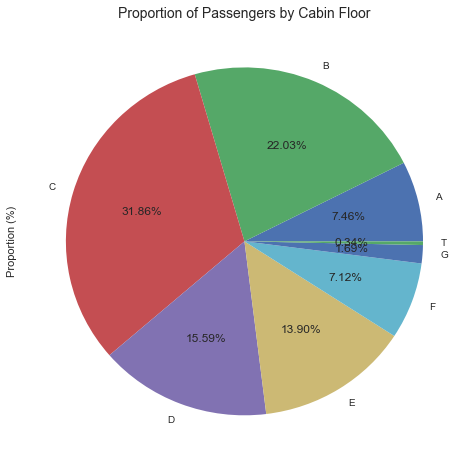

In [88]:
# drop NaN value
deck = titanic['cabin'].dropna()
levels = []
for level in deck:
    levels.append(level[0]) # take the 1st letter in 'cabin' as the floor
cabin = pd.DataFrame(levels)
cabin.columns = ['Cabin']
# calculate the proportion by percentage
cabin_count = pd.DataFrame(cabin['Cabin'].value_counts(normalize=True) * 100)
cabin_count.columns = ['Proportion (%)']
cabin_count.sort_index().plot(kind='pie',autopct='%.2f%%',subplots=True,figsize=(8,8),legend=False)
plt.title("Proportion of Passengers by Cabin Floor", fontsize=14)

### Question 4: 

For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

### Answer
Plot pie charts for the proportion of survivors in different classes.

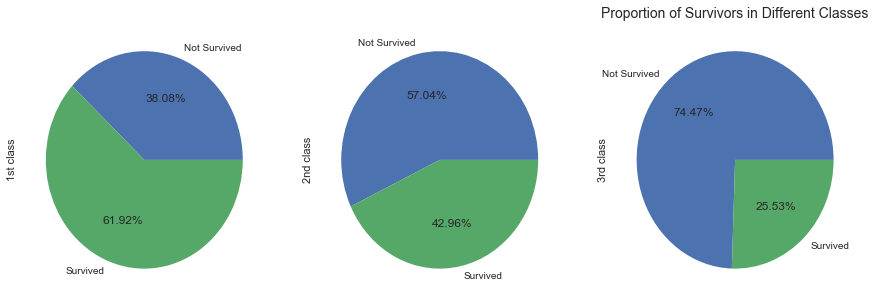

In [89]:
class_survived = titanic.groupby(['pclass']).survived.value_counts().unstack().T
class_survived.plot.pie(autopct = '%.2f%%', subplots=True, legend=False, figsize=(15,5))
plt.title("Proportion of Survivors in Different Classes", fontsize=14)

As the charts show, people who were in a higher class had a better chance of surviving the shipwreck than those who stayed in a lower class. 

That's cruel but true!

### Question 5: 

Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

### Answer
Calculate the proportion of the survivors by travel class and sex. We plot the table in two different ways.

In [90]:
temp = titanic.groupby(['pclass','sex']).survived.value_counts()
temp = temp.unstack()
temp['Proportion (%)'] = temp['Survived']/(temp['Survived']+temp['Not Survived'])*100
temp = temp.drop(['Not Survived','Survived'], axis=1)
class_sex_survived = temp.unstack()
class_sex_survived.columns = ['female','male']
class_sex_survived.index.name = ''
class_sex_survived

,female,male
,,
1st class,96.527778,34.078212
2nd class,88.679245,14.619883
3rd class,49.074074,15.212982


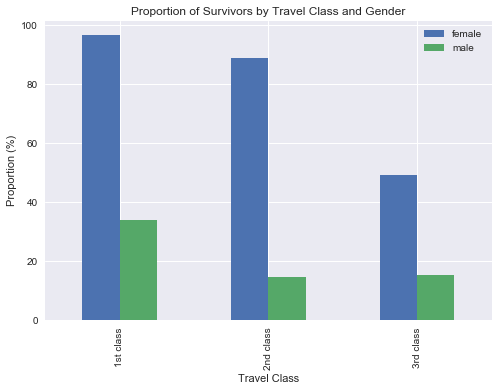

In [91]:
class_sex_survived.plot.bar()
plt.title("Proportion of Survivors by Travel Class and Gender", fontsize=12)
plt.ylabel('Proportion (%)')
plt.xlabel('Travel Class')

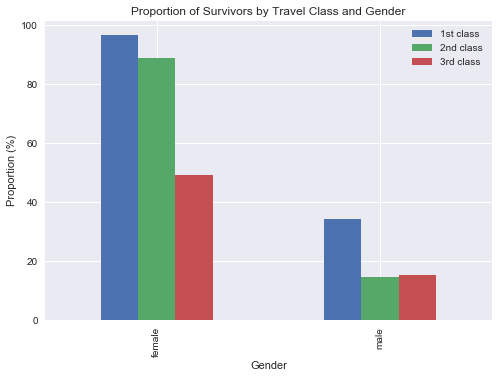

In [92]:
class_sex_survived.T.plot.bar()
plt.title("Proportion of Survivors by Travel Class and Gender", fontsize=12)
plt.ylabel('Proportion (%)')
plt.xlabel('Gender')

As two charts show, people in higher class have high survival probability. 

More importantly, there are more female survivors than male survivors and it's true in all three classes. The female survival probability in the 1st and 2nd classes is over 80%. Even in the 3rd class, where the overall survival probablity is lower, women still have nearly 50% chance of survival. 

These two charts tell us a warm fact that in the crisis of Titanic, gentlemen let ladies go first.

### Question 6: 

Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

### Answer
First, we need to build two equally populated age categories. One intuitive idea is to find the median value.

In [93]:
# drop the NaN columns
titanic_age = titanic[titanic.age.notnull()]

In [94]:
# calculate the median value of age
med_age = titanic_age.age.median()
med_age

28.0

In [95]:
you_df = titanic_age[titanic_age.age<med_age]
med_df = titanic_age[titanic_age.age==med_age]
old_df = titanic_age[titanic_age.age>med_age]

In [96]:
num_you = len(you_df)
print("{} people's ages are younger than median".format(num_you))
num_med = len(med_df)
print("{} people's ages are in median".format(num_med))
num_old = len(old_df)
print("{} people's ages are older than median".format(num_old))

504 people's ages are younger than median
32 people's ages are in median
510 people's ages are older than median


The number of people who are in 28 years old is 32 and we need to randomly put these 32 people in two groups. In order to get two equally populated groups, we put 19 together with the younger group and 13 together with the older group. 

To implement this random assignment, here we use a mask and *numpy.random.shuffle( )* method.

In [97]:
mask1 = [True]*19+[False]*13
np.random.shuffle(mask1)
mask2 = [not i for i in mask1]

In [98]:
g1 = pd.merge(you_df, med_df[mask1],how='outer')
g2 = pd.merge(old_df, med_df[mask2],how='outer')

Print and see the number of people in 2 groups.

In [99]:
print("{} people are in group 1".format(len(g1)))
print("{} people are in group 2".format(len(g2)))

523 people are in group 1
523 people are in group 2


Calculate the survival proportion and merge two dataframes together.

In [100]:
def calculate_survival_prop(df):
    temp = df.groupby(['pclass','sex']).survived.value_counts()
    temp = temp.unstack()
    temp['Proportion (%)'] = temp['Survived']/(temp['Survived']+temp['Not Survived'])*100
    temp = temp.drop(['Not Survived','Survived'], axis=1)
    return temp

In [101]:
gg1 = calculate_survival_prop(g1)
gg1.columns=['% of survivors age_group1']

In [102]:
gg2 = calculate_survival_prop(g2)
gg2.columns=['% of survivors age_group2']

In [103]:
gg = pd.merge(gg1,gg2,left_index=True,right_index=True)

Test if the index is unique.

In [104]:
gg.index.is_unique

True

Show the final result.

In [105]:
gg

% of survivors age_group1  % of survivors age_group2
pclass    sex                                                         
1st class female                  95.121951                  96.739130
          male                    51.612903                  30.833333
2nd class female                  90.566038                  88.000000
          male                    22.222222                   8.139535
3rd class female                  52.830189                  34.782609
          male                    18.636364                  13.953488